# Testing (k)nn for regression

In this case we want to predict function values. Let us start with a linear function.

$f(x) = x$

In [1]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

X = np.reshape( list(range(-20,-5)) + list(range(5,20)), [-1, 1] )
y = np.array(X)

T = np.reshape(list(range(-30,30)), [-1,1])

# Data Array

In [2]:
np.stack((X,y), axis=-1)

array([[[-20, -20]],

       [[-19, -19]],

       [[-18, -18]],

       [[-17, -17]],

       [[-16, -16]],

       [[-15, -15]],

       [[-14, -14]],

       [[-13, -13]],

       [[-12, -12]],

       [[-11, -11]],

       [[-10, -10]],

       [[ -9,  -9]],

       [[ -8,  -8]],

       [[ -7,  -7]],

       [[ -6,  -6]],

       [[  5,   5]],

       [[  6,   6]],

       [[  7,   7]],

       [[  8,   8]],

       [[  9,   9]],

       [[ 10,  10]],

       [[ 11,  11]],

       [[ 12,  12]],

       [[ 13,  13]],

       [[ 14,  14]],

       [[ 15,  15]],

       [[ 16,  16]],

       [[ 17,  17]],

       [[ 18,  18]],

       [[ 19,  19]]])

# Compare uniform kNN to weighted kNN

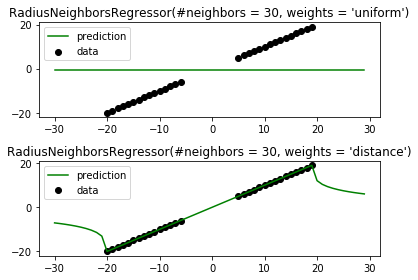

In [3]:
def test(X,y,T, N):
    for i, weights in enumerate(['uniform', 'distance']):
        knn = KNeighborsRegressor(N, weights=weights)
        y_ = knn.fit(X, y).predict(T)
    
        plt.subplot(2, 1, i + 1)
        plt.scatter(X, y, c='k', label='data')
        plt.plot(T, y_, c='g', label='prediction')
        plt.axis('tight')
        plt.legend()
        plt.title("RadiusNeighborsRegressor(#neighbors = %i, weights = '%s')" % (N,
                                                                weights))

    plt.tight_layout()
    plt.show()

test(X, y, T, 30)

### Result: kNN can perfectly approximate all points in between the given points
#### This only works when we observe all 30 points!

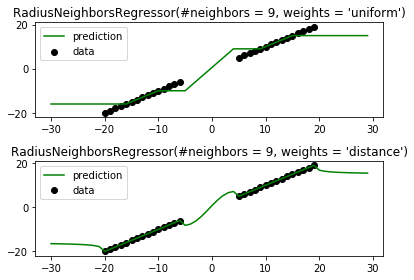

In [4]:
test(X, y, T, 9)

In [5]:
noise = np.random.normal(0,2,[30,1])
y_noise = y + noise

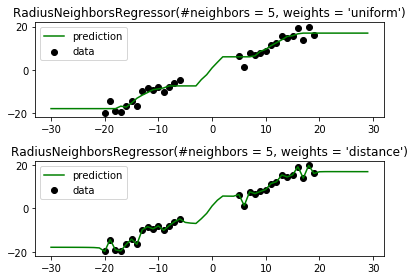

In [6]:
test(X,y_noise, T, 5)

### When we observe all given datapoints, kNN is robust against noise (at least in the linear case)

kNN is extremely dependent on which data points are given, especially the **weighted version** of kNN

It is better to approximate larger regions of uncertainty, but it is also more vulnerable to noise!

Downside of kNN is that it can never predict outside of the value range spanned by the given values.

In this case it will always predict $y \in [-20,20]$